In [1]:
import numpy as np
from matplotlib import pyplot as plt

#import M8195A as awg
#awg_ip = "192.168.0.250"

from sigproc_kit import *

In [2]:
def squatan2(y,x):
    
    o1 = (abs(x) >= abs(y)) * (x>=0) 
    o2 = (abs(x) < abs(y)) * (x>=0) 
    o3 = (abs(x) < abs(y)) * (x<0) 
    o4 = (abs(x) >= abs(y)) * (x<0) 
    
    out = np.zeros(len(x))
    
    yovx = np.abs(y/(x+1e-12))
    xovy = np.abs(x/(y+1e-12))
    
    
    out += o1*yovx
    out += o2*(2-xovy)
    out += o3*(2+xovy)
    out += o4*(4-yovx)
    
    out = out * (y >= 0) - out * (y < 0)
    return out

In [3]:
import serial
import time

# Set up the serial connection
ser = serial.Serial('/dev/ttyACM0', 115200)  # Adjust the baud rate if necessary
time.sleep(.1)  # Wait for the connection to establish


def ask(cmd,**kwargs):
    # function waits for an answer, since readline is blocking 
    ser.reset_input_buffer()
    ser.write(f"{cmd}\n".encode())  # Send the number followed by a newline
    #time.sleep(.001)  # Wait for a second before sending the next number
    line = ser.readline().decode()
    line = line.replace("\r","")
    line = line.replace("\n","")
    #print("readback: ",end="")
    return line




def r_fpga_reg(n):
    cmd="01{:02x}{:04x}".format(n,0);
    ans = ask(cmd)
    return int(ans[4:],16)

def w_fpga_reg(n,val):
    cmd="02{:02x}{:04x}".format(n,val);
    return ask(cmd)

def w_fpga_reg_bit(n,b,state):
    cur_val = r_fpga_reg(n)
    new_val = (cur_val & ~(1<<b)) | (state*(1<<b))
    w_fpga_reg(n, new_val)

In [4]:
print(ask("0102"))

r_fpga_reg(2)

01020000


0

In [5]:
# testing the CORDICAtan2

a = 300
b = a>>1

w_fpga_reg(0,a)
w_fpga_reg(1,b)

c = r_fpga_reg(2)

c

63

In [6]:
nbits = 10

def to_twos_complement(value,nbits):
    # Ensure the value is within the range of a signed 12-bit integer
    if value < -2**(nbits-1) or value > ((2**(nbits-1))-1):
        raise ValueError("Value must be between -2048 and 2047 for 12-bit representation.")
    
    # Calculate two's complement
    if value < 0:
        value = (1 << nbits) + value  # Add 2^12 to the negative value
    return value

# Example usage
#number = -5
#twos_complement = to_twos_complement(number,nbits)


def from_twos_complement(twos_comp,nbits):
    # Ensure the value is within the range of a 12-bit integer
    if twos_comp < 0 or twos_comp >= (1 << nbits):
        raise ValueError("Value must be a 12-bit two's complement integer (0 to 4095).")
    
    # Check if the number is negative
    if twos_comp >= (1 << (nbits-1)):  # If the MSB is 1
        return twos_comp - (1 << (nbits))  # Convert to negative
    return twos_comp  # Return the positive value

# Example usage
#twos_comp_value = 0b111110101011  # Example two's complement value for -5
#signed_integer = from_twos_complement(twos_complement,nbits)
#print(f"Signed integer from two's complement {twos_comp_value:012b} is: {signed_integer}")

#signed_integer
from_twos_complement(to_twos_complement(-30,nbits),nbits)

-30

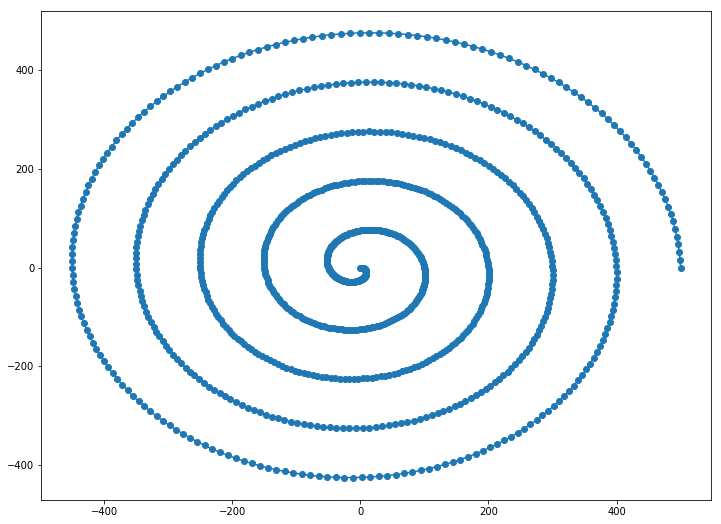

In [13]:
steps = 1000
t = np.linspace(0, 5*2*np.pi, steps)
tau = 30
r = 500

spiral = np.linspace(1,0,steps)


x = r * np.cos(t) * spiral
y = r * np.sin(t) * spiral



plt.scatter(x,y)
plt.plot(x,y)

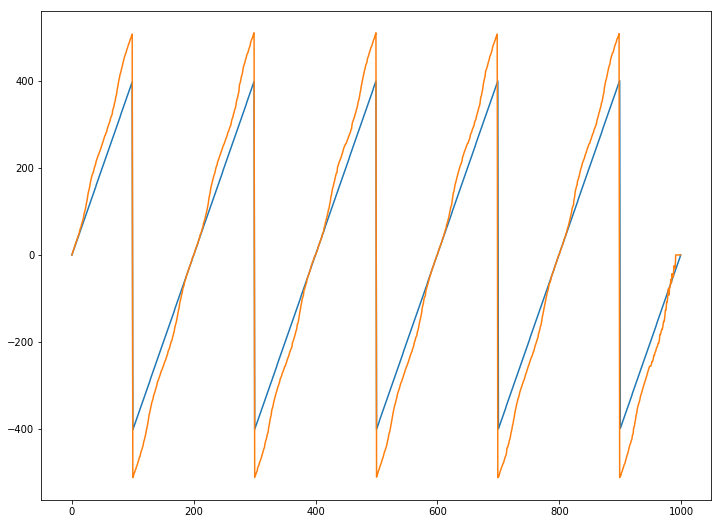

In [14]:
c = np.zeros(len(x))

for i in range(len(x)):
    w_fpga_reg(0,to_twos_complement(int(x[i]),nbits))
    w_fpga_reg(1,to_twos_complement(int(y[i]),nbits))
    c[i] = from_twos_complement(r_fpga_reg(2),nbits)
    
plt.plot(np.floor(2**(nbits-3)*np.arctan2(y,x)))
plt.plot(c)
#plt.scatter(list(range(len(c))),c)

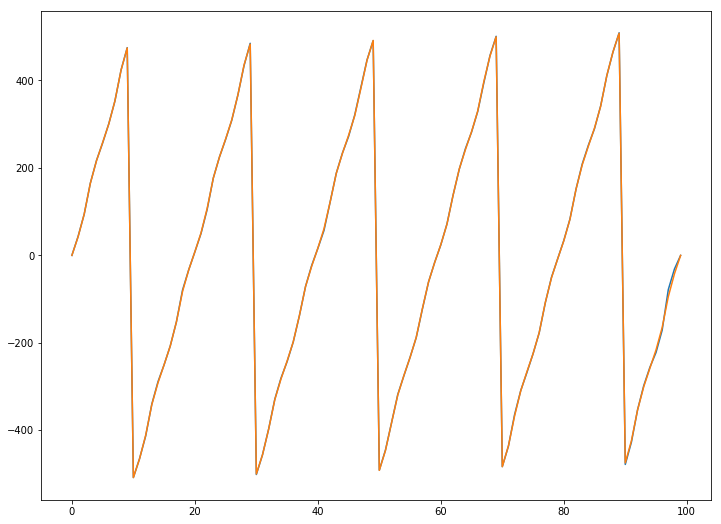

In [9]:
#matplotlib notebook
from my_utils import *
big_figure()
plt.plot(c)
plt.plot(2**(nbits-3) *squatan2(y,x))

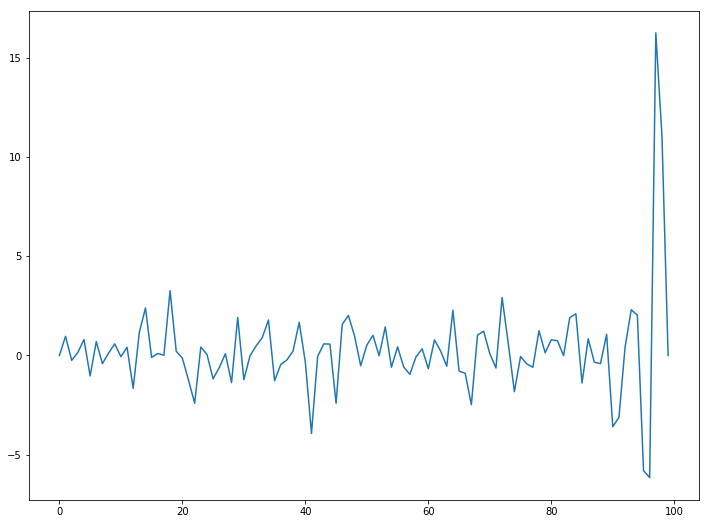

In [43]:


from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))

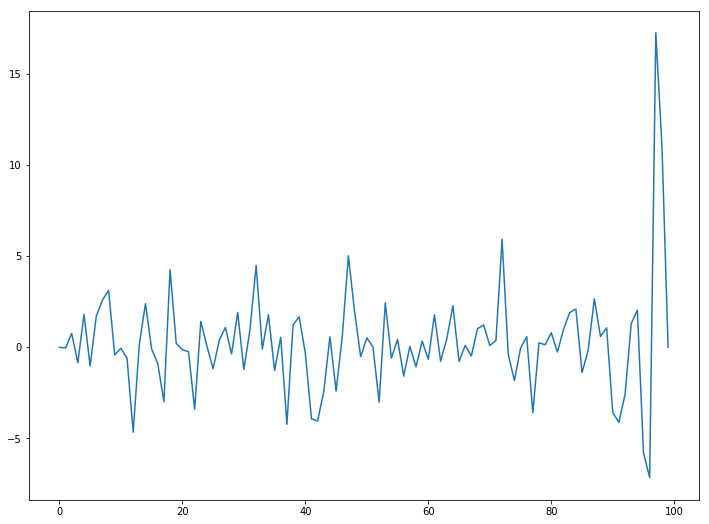

In [37]:

# iterations = nbits -7

from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))

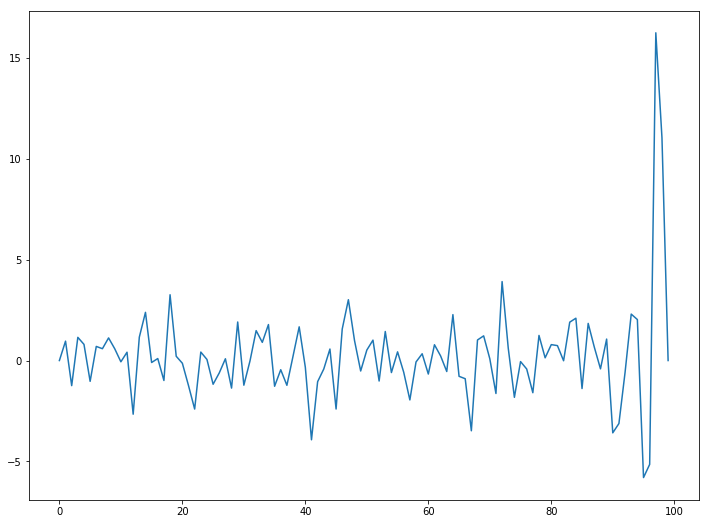

In [35]:

# iterations = nbits -6

from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))

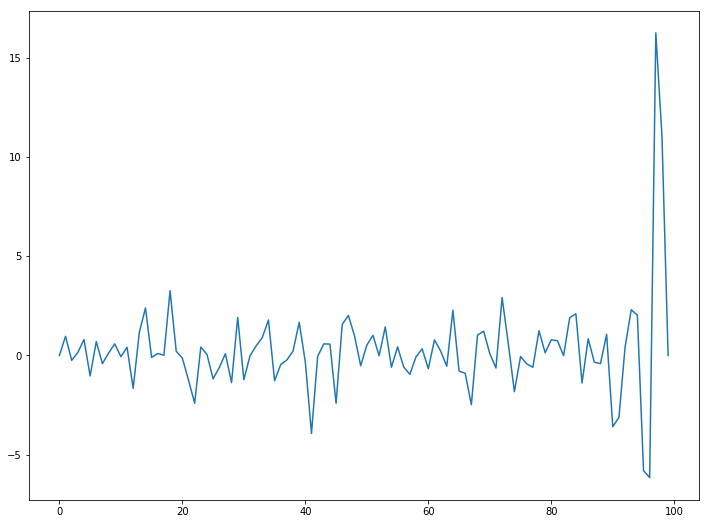

In [33]:

# iterations = nbits -5

from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))

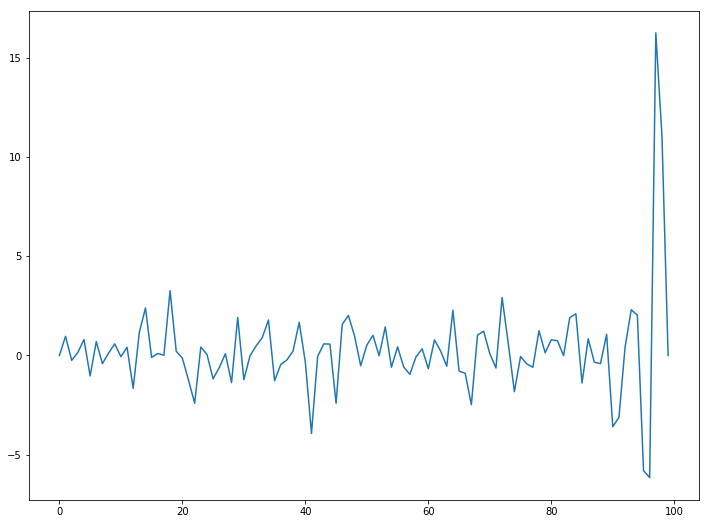

In [29]:

# iterations = nbits -4

from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))

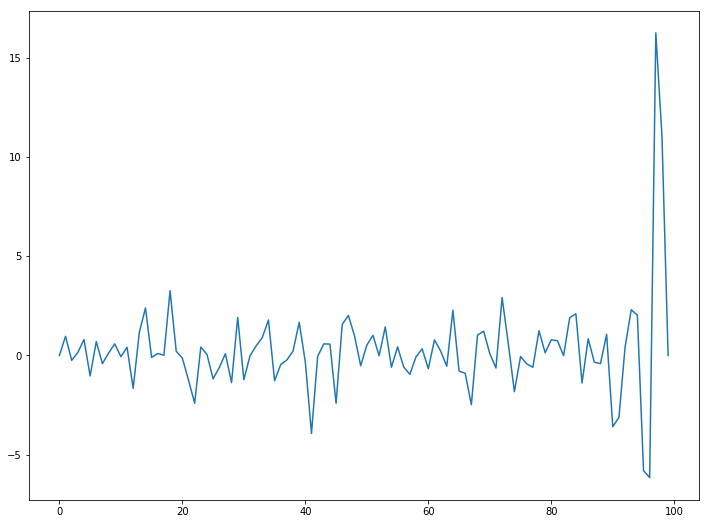

In [31]:

# iterations = nbits -3

from my_utils import *
big_figure()
plt.plot(c - (2**(nbits-3) *squatan2(y,x)))